In [ ]:
!pip install opencv-python

In [ ]:
!pip install face_recognition

In [ ]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os

In [ ]:
imagePaths = list(paths.list_images('/content/Jim Carrey'))
knownEncodings = []
knownNames = []

# Loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
  name = imagePath.split(os.path.sep)[-2]
  # dlib ordering (RGB)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,model='hog')
  encodings = face_recognition.face_encodings(rgb, boxes)

  for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

data = {"encodings": knownEncodings, "names": knownNames}
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

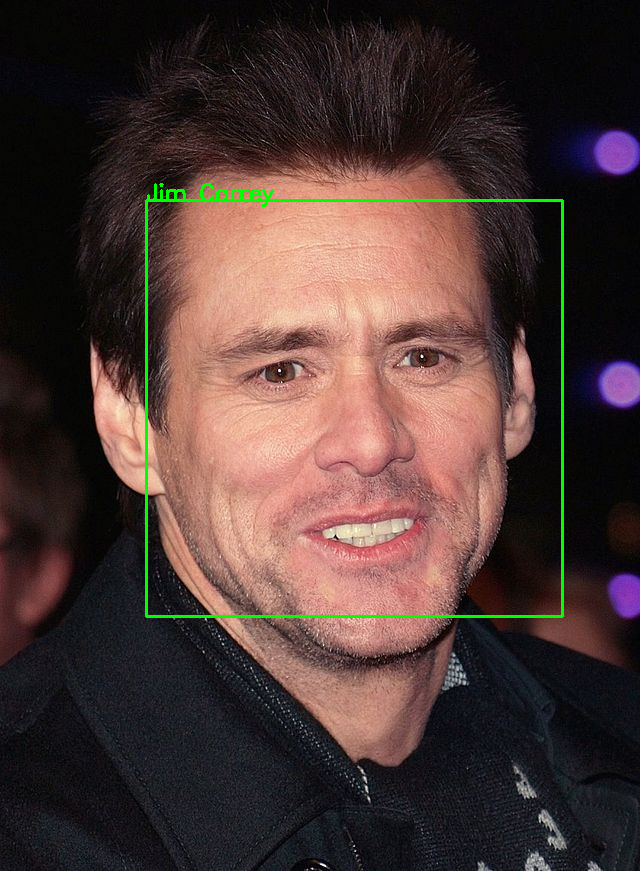

In [ ]:
cascPathface = os.path.dirname(
 cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPathface)
data = pickle.loads(open('face_enc', "rb").read())

image = cv2.imread('/content/Jim.jpg') # Add Image Here to Detection

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)

# the facial embeddings for face in input
encodings = face_recognition.face_encodings(rgb)
names = []

for encoding in encodings:

    matches = face_recognition.compare_faces(data["encodings"],
    encoding)
    name = "Unknown"

    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}
        for i in matchedIdxs:

            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1
            name = max(counts, key=counts.get)


        # update the list of names
        names.append(name)
        for ((x, y, w, h), name) in zip(faces, names):

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
             0.75, (0, 255, 0), 2)
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)
    cv2.waitKey(0)